Preprocessing the Iris Dataset
Goal:
Load the Iris dataset
Standardize the features
Save the cleaned version for reuse

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target



2. preprocess
o Handle any missing values (demonstrate checks). 
o Normalize features using Min-Max scaling. 
o Encode the class label if needed (e.g., one-hot for some models). 

In [37]:
# 2a. check missing, duplicate values
missing_values = df.isnull().sum()
missing_values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [38]:
# 2b. normalize features using Min-Max scaling
scaler = MinMaxScaler()
df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])

# 2c. encode the class label if needed (e.g., one-hot for some models)
encoder = OneHotEncoder(sparse_output=False)
encoded_target = encoder.fit_transform(df[["target"]])
encoded_df = pd.DataFrame(encoded_target, columns=encoder.get_feature_names_out(["target"]))
df = pd.concat([df, encoded_df], axis=1).drop("target", axis=1)

3. Explore
o Compute summary statistics (mean, std, etc.) using pandas.describe(). 
o Visualize: Pairplot (using seaborn) and correlation heatmap. 
o Identify any potential outliers using boxplots.

In [39]:
#  3a. summary statistics
summary_stats = df.describe()
print(summary_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)    target_0    target_1    target_2  
count        150.000000  150.000000  150.000000  150.000000  
mean           0.458056    0.333333    0.333333    0.333333  
std            0.317599    0.472984    0.472984    0.472984  
min            0.000000    0.000000    0.000000    0.000000  
25%            0.083333    0.000000    0.000000    0.000000  
50%            0.500000    0.000000    0.0

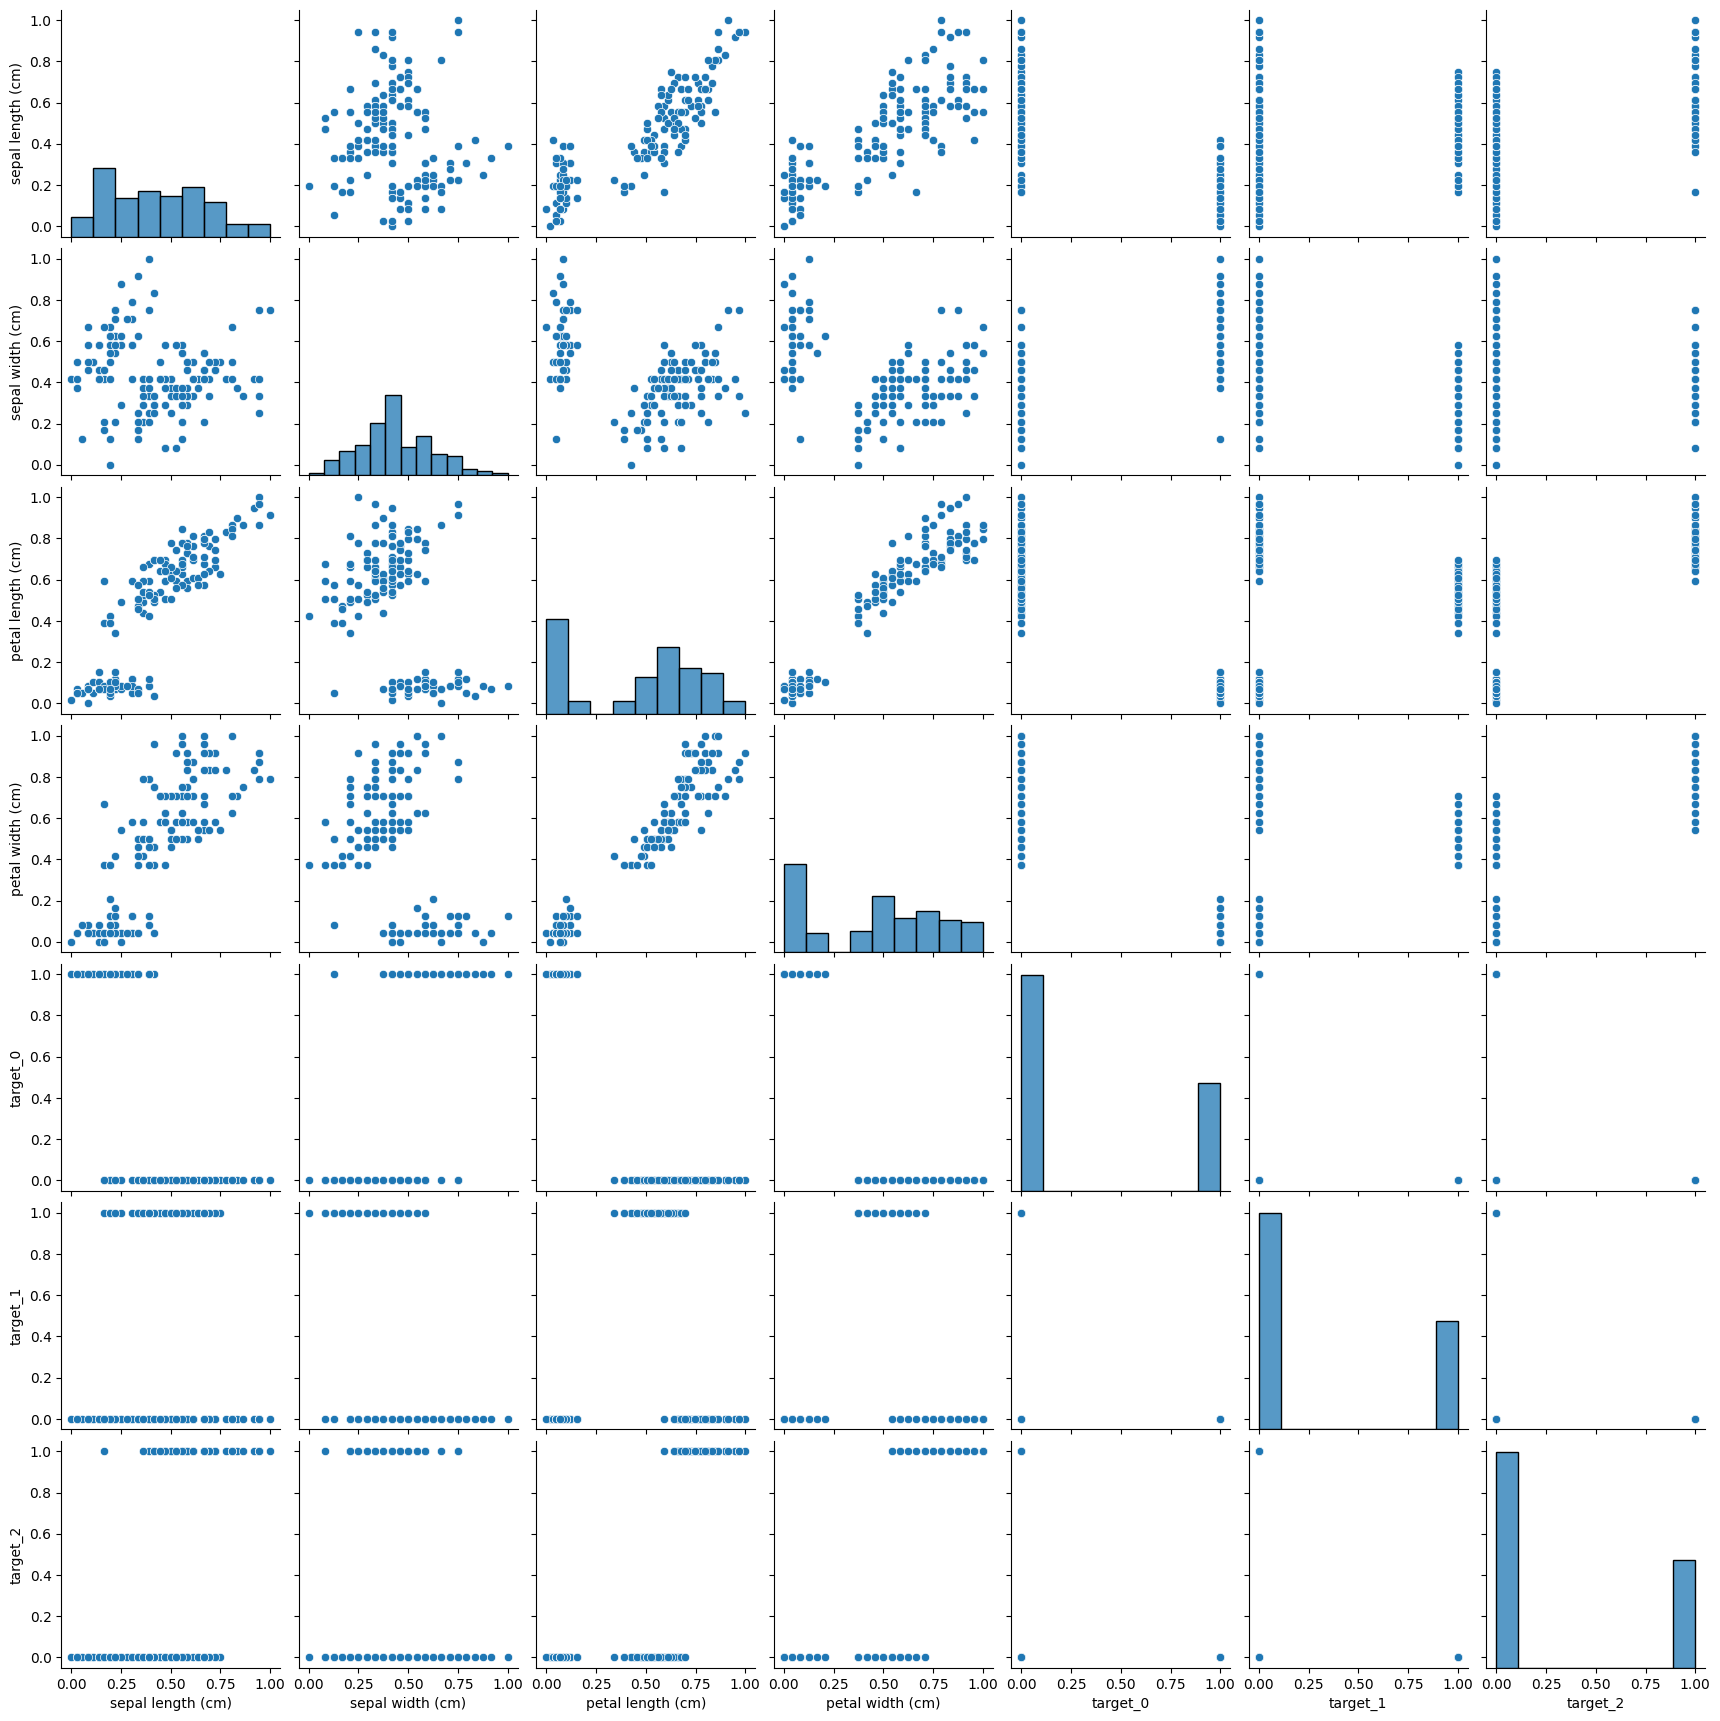

FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/pairplot.png'

<Figure size 640x480 with 0 Axes>

In [40]:
# 3b. Visualize: Pairplot and correlation heatmap
sns.pairplot(df)
plt.show()
plt.savefig("visualizations/pairplot.png")

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("visualizations/correlation_heatmap.png")

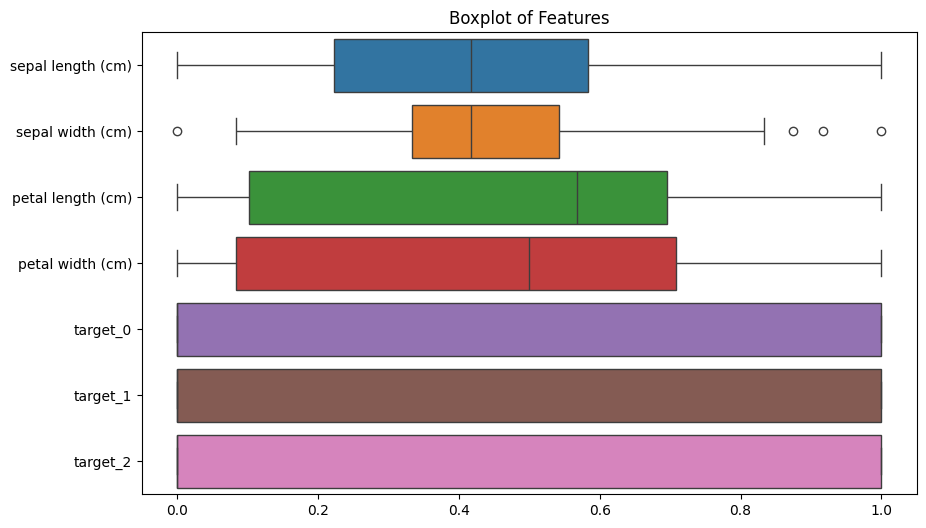

In [ ]:
# 3d.boxplot to identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot of Features")
plt.savefig("boxplot_features.png")



The boxplot for sepal length revealed a few data points lying outside the whiskers, indicating statistical outliers. These outliers represent flower samples with unusually short or long sepals compared to the majority of the dataset. While the typical sepal length ranges between 4.5 cm and 7.0 cm, the outliers fall outside this range, suggesting either:
1. Natural biological variation within species,
2. Measurement anomalies, or
3. Rare traits that may belong to hybrids or misclassified samples.
outliers can affect normalization and scaling of lerning models, especially if extreme values distort feature distributions. They can either be removed or retained. For this project, the outliers were retained to preserve the dataset’s integrity and allow models to learn from full natural variation.

In [ ]:
# 4 train/test split function
def split_data(dataframe, test_size=0.2):
    return train_test_split(dataframe, test_size=test_size, random_state=42)


In [ ]:
# Save the cleaned dataset 
import os
os.makedirs("datamining", exist_ok=True)
df.to_csv("datamining/iris_cleaned.csv", index=False)
print("Preprocessed Iris dataset saved to iris_cleaned.csv")

Preprocessed Iris dataset saved to iris_cleaned.csv
